Απαλλακτικη Εργασια Σεπτεμβρη
Μαυροπουλος Ανδρεας 217129

# Census Data Income dataset

Attribute Information:

Listing of attributes:

>50K, <=50K.

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


## Imports

In [1]:
# Ploting
import matplotlib.pyplot as plt
import seaborn as sns
# Pandas
import pandas as pd
# Numpy
import numpy as np

# Sk learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# Tensorflow
import tensorflow as tf
from keras import backend as K

In [2]:
# Make by default all fig sized 10 ,6
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [4]:
# Download data using wget
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2021-09-20 19:05:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  8.84MB/s    in 0.4s    

2021-09-20 19:05:45 (8.84 MB/s) - ‘adult.data’ saved [3974305/3974305]



In [5]:
# Download test using wget
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2021-09-20 19:05:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2003153 (1.9M) [application/x-httpd-php]
Saving to: ‘adult.test’

adult.test          100%[===================>]   1.91M  5.38MB/s    in 0.4s    

2021-09-20 19:05:45 (5.38 MB/s) - ‘adult.test’ saved [2003153/2003153]



Importand data  for the feature engineering

In [6]:
col_names = ['Age','workclass','fnlwgt','education','education-num','marital-status',
             'occupation','relationship','race','sex','capital-gain','capital-loss',
             'hours-per-week','native-country','income']


education_replacement = {
      "Preschool": "primary_education",
      'primary' : "primary_education",
      "1st-4th": "primary_education",
      "5th-6th": "primary_education",
      "7th-8th": "primary_education",

      "9th": "secondary_education",
      "10th": "secondary_education",
      "11th": "secondary_education",
      "12th": "secondary_education",
      "HS-grad": "secondary_education",
      
      "Assoc-voc": "higher_education",
      "Assoc-acdm": "higher_education",
      "Prof-school": "higher_education",
      "Some-college": "higher_education",
  } 
marital_replacement = {
      "Married-civ-spouse": "Married",
      "Married-AF-spouse": "Married",
      
      "Never-Married" : "not-married",

      "Divorced" : 'other',
      "Widowed": 'other',
      "Married-spouse-absent" : "other"
  }         

# 1.1 Φόρτωση δεδομένων


In [7]:
def load_data(train_path,test_path):
  '''
  Takes a train and test path 
  removes ? data from worckclass occupation and native country columns
  reduces education and marital layers
  turns all data into numeric using LabelEncoder
  Normalizes all data using StandardScaler
  returns a train test split (X_train,y_train,X_test,y_test)
  '''
  # Put train data into a dataframe
  df_data = pd.read_csv(train_path,header = None)
  df_data.columns = col_names
  # Put test data into a dataframe
  df_test = pd.read_csv(test_path,header = 1) # Dataset has a first line which needs to be skipped
  df_test.columns = col_names
  # 1. Remove fnlwgt and education-num
  df_data.drop('fnlwgt',inplace=True,axis=1)
  df_data.drop('education-num',inplace=True,axis=1)
  
  df_test.drop('fnlwgt',inplace=True,axis=1)
  df_test.drop('education-num',inplace=True,axis=1)

  # 2. Turn all variables into numeric ones
  # First lets fill all ? values 
  # replace ? with the most common occurance in column
  df_data['workclass'] = df_data['workclass'].str.replace("?","Private")
  df_data['occupation'] = df_data['occupation'].str.replace('?',"Prof-specialty")
  df_data['native-country'] = df_data['native-country'].str.replace('?','United-States')
  # Now for the test dataset
  df_test['workclass'] = df_test['workclass'].str.replace("?","Private")
  df_test['occupation'] = df_test['occupation'].str.replace('?',"Prof-specialty")
  df_test['native-country'] = df_test['native-country'].str.replace('?','United-States')

  # Time to do some feature engineering in order to lower some features
  # Education REPLACEMENT
  df_data['education'] =  df_data['education'].replace(education_replacement, regex=True)
  df_test['education'] =  df_test['education'].replace(education_replacement, regex=True)
  # Relationship replacements
  df_data['marital-status'] =  df_data['marital-status'].replace(marital_replacement, regex=True)
  df_test['marital-status'] =  df_test['marital-status'].replace(marital_replacement, regex=True)

  # Turn all data into numeric type using scikit learn label encoder
  df_data= df_data.apply(LabelEncoder().fit_transform)
  df_test= df_test.apply(LabelEncoder().fit_transform)

  # Make a train test split 
  X_train = df_data.drop('income',axis=1)
  y_train = df_data['income']
  X_test = df_test.drop('income',axis=1)
  y_test =  df_test['income']


  # Normalize all data using MinmaxScaler
  # First for the training data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  # The testing data does not need to standarized


  return X_train,y_train,X_test,y_test

#1.3 Εκτύπωση μετρικών
Function that prints out model metrics specificaly:
- accuracy
- precision
- recall 

  for the positive class (>= 50K) and for the negative (<50)
- precision

- recall 

In [8]:
"""
Helper functions to better determine model recall precision and f1 score
"""


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [9]:
def print_metrics(model,X_train,y_train,X_test,y_test):
  """
  Gives a classification report on the model 
  For both training and testing data
  """
  # Firstly using classification report from scikit learn
  y_pred = model.predict(X_test, verbose=0)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print("------------ Test dataset ------------")
  print(classification_report(y_test, y_pred_bool))
  print("------------ Train dataset ------------")
  y_pred = model.predict(X_train, verbose=0)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(classification_report(y_train, y_pred_bool))

  # Secondly using the keras backend method
  loss_test, accuracy_test, f1_score_test, precision_test, recall_test = model.evaluate(X_test, y_test, verbose=0)
  loss_train, accuracy_train, f1_score_train, precision_train, recall_train = model.evaluate(X_train, y_train, verbose=0)
  print(f"Testing accuracy: {accuracy_test} Training accuracy:{accuracy_train}")
  print(f"Testing f1_score: {f1_score_test} Training f1_score: {f1_score_train}")
  print(f"Testing precision: {precision_test} Training precision: {precision_train}")
  print(f"Testing recall: {recall_test} Training recall: {recall_train}")
  print(f"Testing loss: {loss_test} Training loss: {loss_train}")

In [10]:
def plot_history(history,choice):
  """
  Give choice between :
  ['acc',f1_m,precision_m, recall_m]
  """
  pd.DataFrame(history.history[choice]).plot(figsize=(10,6))
  plt.ylabel(choice)
  plt.xlabel("epochs")
  plt.show()

In [11]:
 X_train,y_train,X_test,y_test= load_data(train_path = 'adult.data',
                            test_path = 'adult.test')

## 1.4 Time to build the first simple model

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(13),                         
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01),
                metrics=['acc',f1_m,precision_m, recall_m])

# 3. Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=10,verbose = 0 )

In [13]:
print_metrics(model_1,X_train,y_train,X_test,y_test)

------------ Test dataset ------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12434
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16280
   macro avg       0.38      0.50      0.43     16280
weighted avg       0.58      0.76      0.66     16280

------------ Train dataset ------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     24720
           1       0.00      0.00      0.00      7841

    accuracy                           0.76     32561
   macro avg       0.38      0.50      0.43     32561
weighted avg       0.58      0.76      0.66     32561

Testing accuracy: 0.6632063984870911 Training accuracy:0.6687448024749756
Testing f1_score: 0.4726524353027344 Training f1_score: 0.46294358372688293
Testing precision: 0.38139453530311584 Training precision: 0.38408762216567993
Testing recall: 0.6648513674736023 Tra

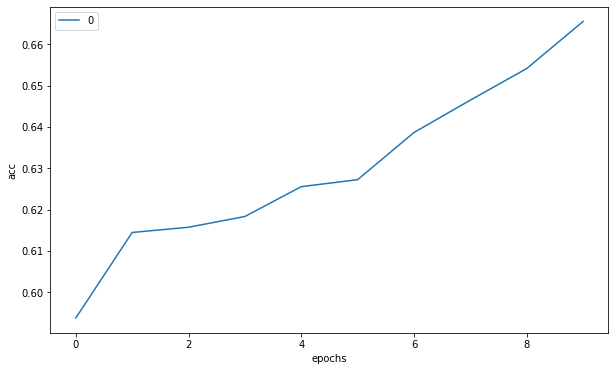

In [14]:
plot_history(history_1,'acc')

## 1.5 Build a more complex model using 2 hidden layers

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(200,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01),
                metrics=['acc',f1_m,precision_m, recall_m])

# 3. Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=30,verbose=0)

In [16]:
print_metrics(model_2,X_train,y_train,X_test,y_test)

------------ Test dataset ------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12434
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16280
   macro avg       0.38      0.50      0.43     16280
weighted avg       0.58      0.76      0.66     16280

------------ Train dataset ------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     24720
           1       0.00      0.00      0.00      7841

    accuracy                           0.76     32561
   macro avg       0.38      0.50      0.43     32561
weighted avg       0.58      0.76      0.66     32561

Testing accuracy: 0.23624078929424286 Training accuracy:0.24080955982208252
Testing f1_score: 0.3767758309841156 Training f1_score: 0.38178351521492004
Testing precision: 0.23618614673614502 Training precision: 0.24080701172351837
Testing recall: 1.0 Training recall:

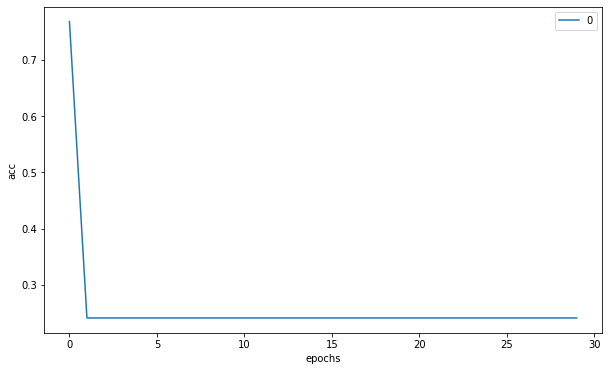

In [17]:
plot_history(history_2,'acc')

### Ερώτημα 2: Σχολιάστε την επίδοση των δύο μοντέλων. Που πιστεύετε ότι οφείλεται η χειρότερη επίδοση στην θετική κλάση; Ποια θεωρείτε ότι είναι τα πλεονεκτήματα και τα μειονεκτήματα του κάθε μοντέλου;


---
Για αρχή μου φαινετε απολύτως λογικό τα μοντέλα να μην μπορούν να παράξουν τα ίδια αποτελέσματα στην θετική κλάση όσο σε σχέση με την αρνητική γιατί υπάρχει μια απίστευτη διάφορα στα δεδομένα. Η αρνητική κλάση έχει πολλαπλάσια παραδείγματα, και πέρα από το bayesian πρόβλημα που προκύπτει λόγω τον παραδειγματον στην θετική κλάση τα μοντέλα δεν μπορούν να φτάσουν την ακρίβεια τα οποία ζητάμε από αυτά. Άρα ητε μειώνουμε τα αρνητικά παραδείγματα ητε προσπαθούμε να βρούμε περισσότερα θετικά ώστε να φτάσουμε στα επιθυμητά αποτελέσματα.

Όσον άφορα τα μοντέλα, μια σωστή πρακτική θα ήταν πριν το normalization των δεδομένων να αφαιρούσαμε μερικές outlier τιμές, οστε το σύνολο να έχει μια κανονική κατανομή. Για το μοντέλο 1 παρατηρούμε μια καλή αύξηση στην ακρίβεια με την πάροδο τον epochs αλλά βλέπουμε ότι μετά τα 10 αρχίζει και πέφτει πάλι. Αυτό μπορεί να οφείλετε σε 2 κυρίως προβλήματα. Πρώτον το μοτελο μας είναι πολύ απλό και δεν μπορεί να μάθει παραπάνω. Η όπως προαναφέρθηκε παραπάνω χρειαζόμαστε περισσότερα δεδομένα στην θετική κλάση.
Τώρα για το μοντέλο 2 παρατηρούμε ότι παρόλο που είναι ένα μοντέλο με περισσότερο βάθος και περισσότερες συνιστώσες και επομένως συνδέσεις ότι έχει πρόβλημα στο να βρει κοινά σημεία στα δεδομένα μας. Αυτό οφείλετε κυρίως στο ότι τα δεδομένα μας είναι απλά και εμείς χρησημοποιουμε ένα πολύ περίπλοκο σύστημα νευρώνων. Προσπαθεί να βρει κοινά σημεία σε υπερβολικό βάθος καταλήγοντας να μας δίνει αρνητικά αποτελέσματα.
Τέλος και τα 2 μοντέλα βλέπουμε ότι δυσκολεύονται στα training δεδομένα και καταλήγουν να μαντεύουν σχεδόν το τι κλάση θα βγει. Επομένως για να φτάσουμε σε καλύτερα αποτελέσματα θα πρέπει, να αυξήσουμε το training και των 2 μοντελον προσθετωντας ένα callback, να αυξήσουμε την πολυπλοκότητα του μοντέλου 1 και να μειώσουμε την πολυπλοκότητα του μοντέλου 2, να δοκιμάσουμε περισσότερα optimizers και learning_rates, και τέλος να βρούμε περισσότερα δεδομένα.


# Ολοκληρωμενο  προτζεκτ:
https://colab.research.google.com/drive/1LG9LQjG4XfOGWHnsejellSGrZfqx630-?usp=sharing